In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["cmr10", "cmsy10"]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.grid"] = True


import Qubits

kB = sc.constants.Boltzmann
hbar = sc.constants.hbar
h = sc.constants.h

In [65]:
beta = 50
delta = 40

EC = delta/beta

gatemon = Qubits.gatemon_flux(75, EC, delta, 0.1, 0)

T_arr = np.linspace(0, 1, 100)

In [66]:
omega_q_A = np.zeros_like(T_arr)

for i in range(len(T_arr)):
    gatemon.T = T_arr[i]
    gatemon.solve()
    omega_q_A[i] = gatemon.eigvals[1] - gatemon.eigvals[0]

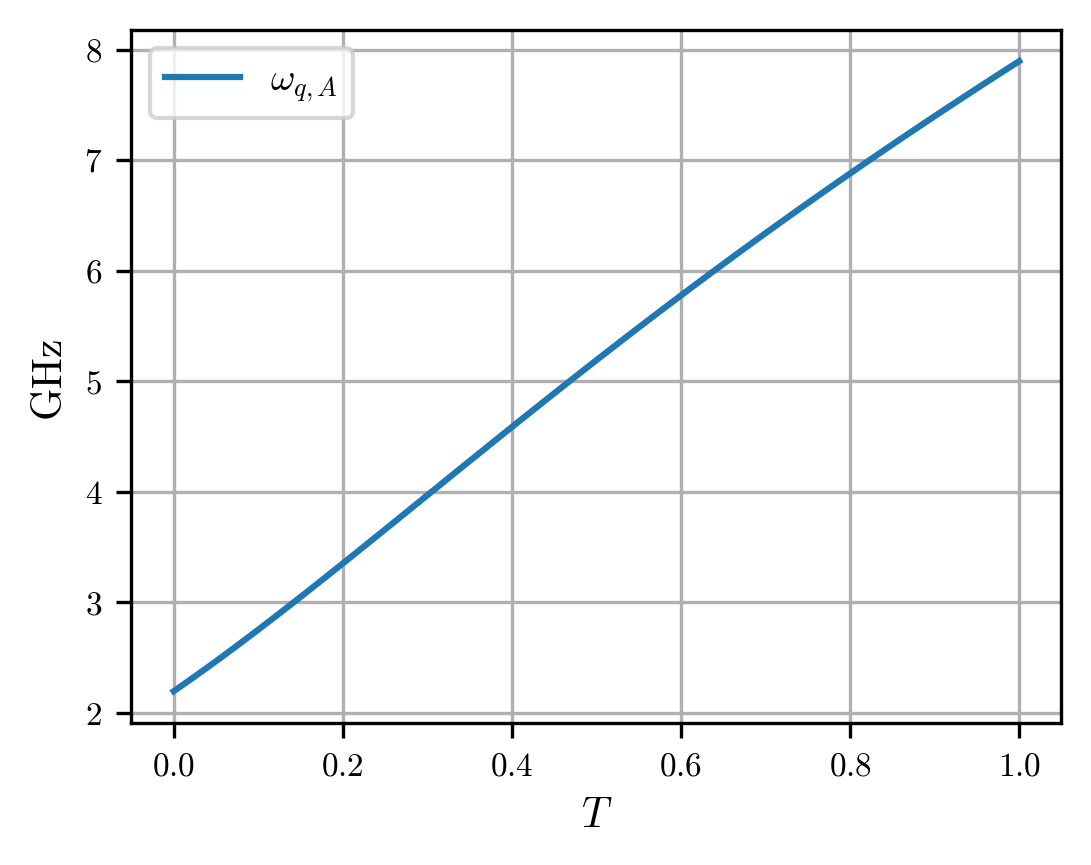

In [67]:
plt.plot(T_arr, omega_q_A, label=r"$\omega_{q,A}$")
plt.xlabel(r"$T$")
plt.ylabel(r"GHz")
plt.legend()

In [68]:
EJ_arr = (omega_q_A+EC)**2/(8*EC)

omega_q_T = np.zeros_like(EJ_arr)

transmon = Qubits.transmon_flux(75, EC, 1, 0)

for i in range(len(EJ_arr)):
    transmon.EJ = EJ_arr[i]
    transmon.solve()
    omega_q_T[i] = transmon.eigvals[1] - transmon.eigvals[0]


In [69]:
x = np.linspace(min(omega_q_A), max(omega_q_A), 50)

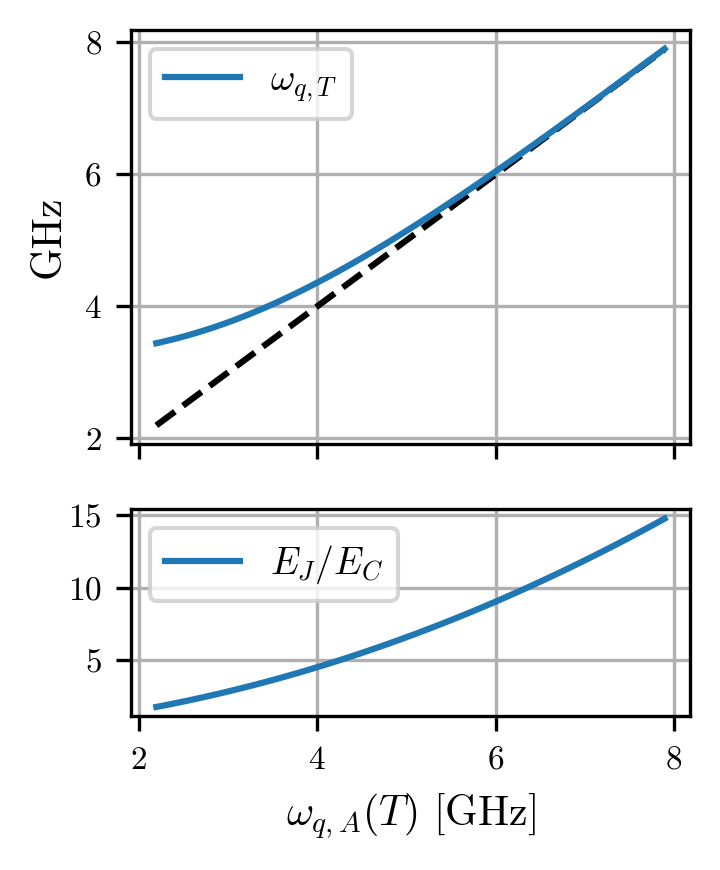

In [70]:
fig, ax = plt.subplots(2,1, figsize=((2.5, 3)), height_ratios=[3,1.5], sharex = True)

ax[0].plot(x, x, "--", color = "black")
ax[0].plot(omega_q_A, omega_q_T, label=r"$\omega_{q,T}$")
#ax[0].set_xlabel(r"$\omega_{q,A}(T)$ [GHz]")
ax[0].set_ylabel("GHz")
#ax[0].axis('equal')
ax[0].legend()


ax[1].plot(omega_q_A, EJ_arr/EC, label = r"$E_J/E_C$")
ax[1].set_xlabel(r"$\omega_{q,A}(T)$ [GHz]")
ax[1].legend()

fig.tight_layout()

In [71]:
def EJ_func(EC, w):
    return (w+EC)**2/(8*EC)

gamma_Averin_ohmic = np.zeros_like(T_arr)
gamma_Averin_1f = np.zeros_like(T_arr)
gamma_Transmon_ohmic = np.zeros_like(T_arr)
gamma_Transmon_1f = np.zeros_like(T_arr)
omega_A = np.zeros_like(T_arr)
omega_T = np.zeros_like(T_arr)
beta_arr = np.zeros_like(T_arr)

for i in range(len(T_arr)):
    gatemon.T = T_arr[i]
    gatemon.solve()
    omega_q = gatemon.eigvals[1] - gatemon.eigvals[0]
    omega_A[i] = omega_q

    EJ = EJ_func(EC, omega_q)
    beta_arr[i] = EJ/EC

    transmon.EJ = EJ
    transmon.solve()
    omega_T[i] = transmon.eigvals[1] - transmon.eigvals[0]

    gamma_A = gatemon.T_1_gamma()
    gamma_Averin_1f[i] = gamma_A[0]
    gamma_Averin_ohmic[i] = gamma_A[1]

    gamma_T = transmon.T_1_gamma()
    gamma_Transmon_1f[i] = gamma_T[0]
    gamma_Transmon_ohmic[i] = gamma_T[1]



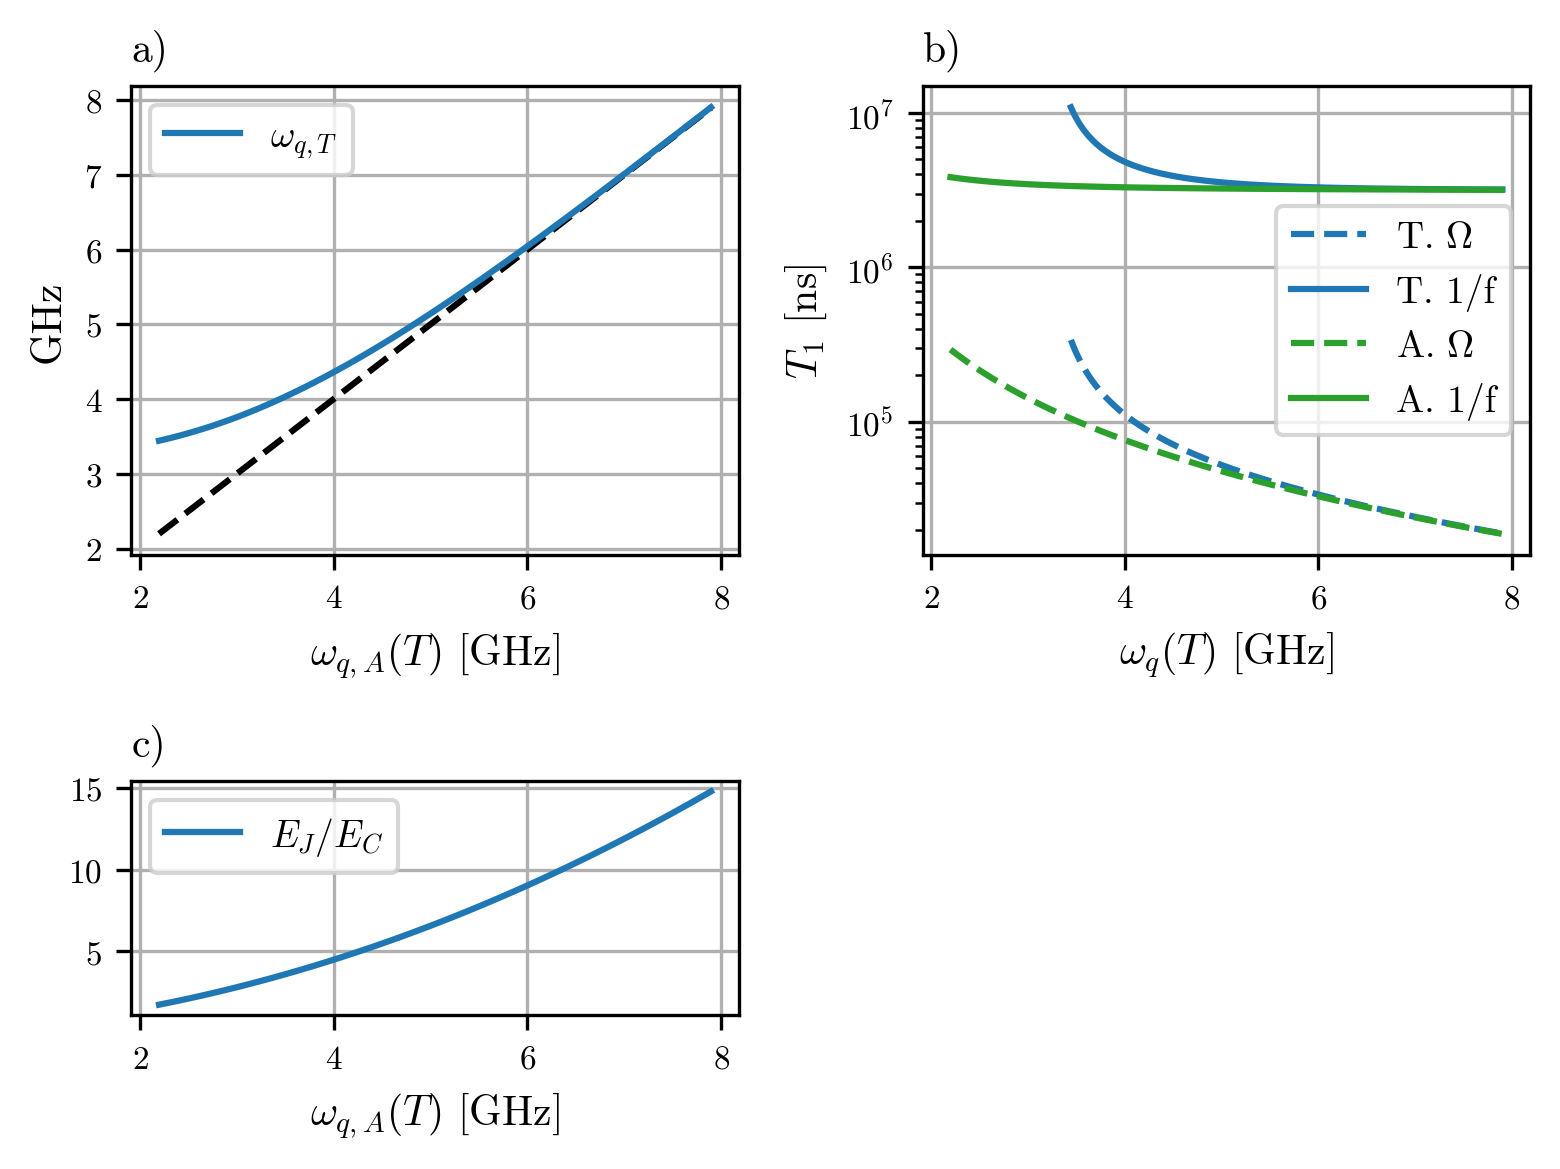

In [83]:
fig, ax = plt.subplots(2,2, figsize=((5.3, 4)), height_ratios=[3,1.5])

ax[0,0].plot(x, x, "--", color = "black")
ax[0,0].plot(omega_q_A, omega_q_T, label=r"$\omega_{q,T}$")
ax[0,0].set_xlabel(r"$\omega_{q,A}(T)$ [GHz]")
ax[0,0].set_ylabel("GHz")
#ax[0].axis('equal')
ax[0,0].legend()


ax[0,1].plot(omega_T, 1/gamma_Transmon_ohmic, "--", label=r"T. $\Omega$", color = "C0")
ax[0,1].plot(omega_T, 1/gamma_Transmon_1f, label=r"T. 1/f", color = "C0")
ax[0,1].plot(omega_A, 1/gamma_Averin_ohmic, "--", label=r"A. $\Omega$", color = "C2")
ax[0,1].plot(omega_A, 1/gamma_Averin_1f, label=r"A. 1/f", color = "C2")
ax[0,1].set_xlabel(r"$\omega_{q}(T)$ [GHz]")
ax[0,1].set_ylabel(r"$T_1$ [ns]")
ax[0,1].set_yscale("log")
ax[0,1].legend()

ax[1,0].plot(omega_A, beta_arr, label=r"$E_J/E_C$")
ax[1,0].set_xlabel(r"$\omega_{q,A}(T)$ [GHz]")
ax[1,0].legend()

ax[0,0].set_title("a)", loc = "left", fontsize = 10)
ax[0,1].set_title("b)", loc = "left", fontsize = 10)
ax[1,0].set_title("c)", loc = "left", fontsize = 10)

fig.delaxes(ax[1,1])

fig.tight_layout()

In [1]:
h_in_eV = sc.constants.physical_constants["Planck constant in eV/Hz"][0]


160*1e-6/h_in_eV * 1e-9



NameError: name 'sc' is not defined